# **Base de datos**
### **1. Información del dataset**
**Nombre:** WAY-EEG-GAL. <br>
**Participantes:** 12 personas. <br>
**Tarea experimental:** Agarre y levantamiento de objetos a diferentes pesos. <br>
**Señales de interés:** Señales EMG de músculos del brazo y la mano. <br>
**Número de canales:** 5 por cada participante. <br>
**Frecuencia de muestreo:** 500 Hz. <br>
**Formato de archivos:** .mat . <br>
**Duración de muestras:** 3 - 5 segundos. <br>

**Músculos sensados:**
- Flexor superficial de los dedos (FDS)
- Extensor común de los dedos (EDC)
- Braquiorradial (BR)
- Deltoides anterior (AD)
- Primer interóseo dorsal (FDI)  

**Referencia del dataset:** Luciw, M., Jarocka, E., & Edin, B. (2014). Multi-channel EEG recordings during 3,936 grasp and lift trials with varying weight and friction. Scientific Data, 1, 140047. https://doi.org/10.1038/sdata.2014.47 <br>

### **2. Relevancia**
El análisis de la activación muscular durante tareas de agarre y levantamiento de objetos permite tener una referencia cercana a los gestos de levantamiento de pesas y flexión-extensión del antebrazo, lo que hace que los datos sean útiles para validar algoritmos de detección de ejecución.

### **3. Librerías importadas**
- NumPy → manejo de matrices y operaciones numéricas sobre las señales EMG.
- Matplotlib → graficar las señales crudas y resultados del análisis.
- SciPy → cargar archivos .mat, aplicar filtros y procesar señales.
- NeuroKit2 → preprocesamiento y extracción rápida de características de EMG.

### **4. Código para la extracción de datos de muestra (Sujeto 1)**

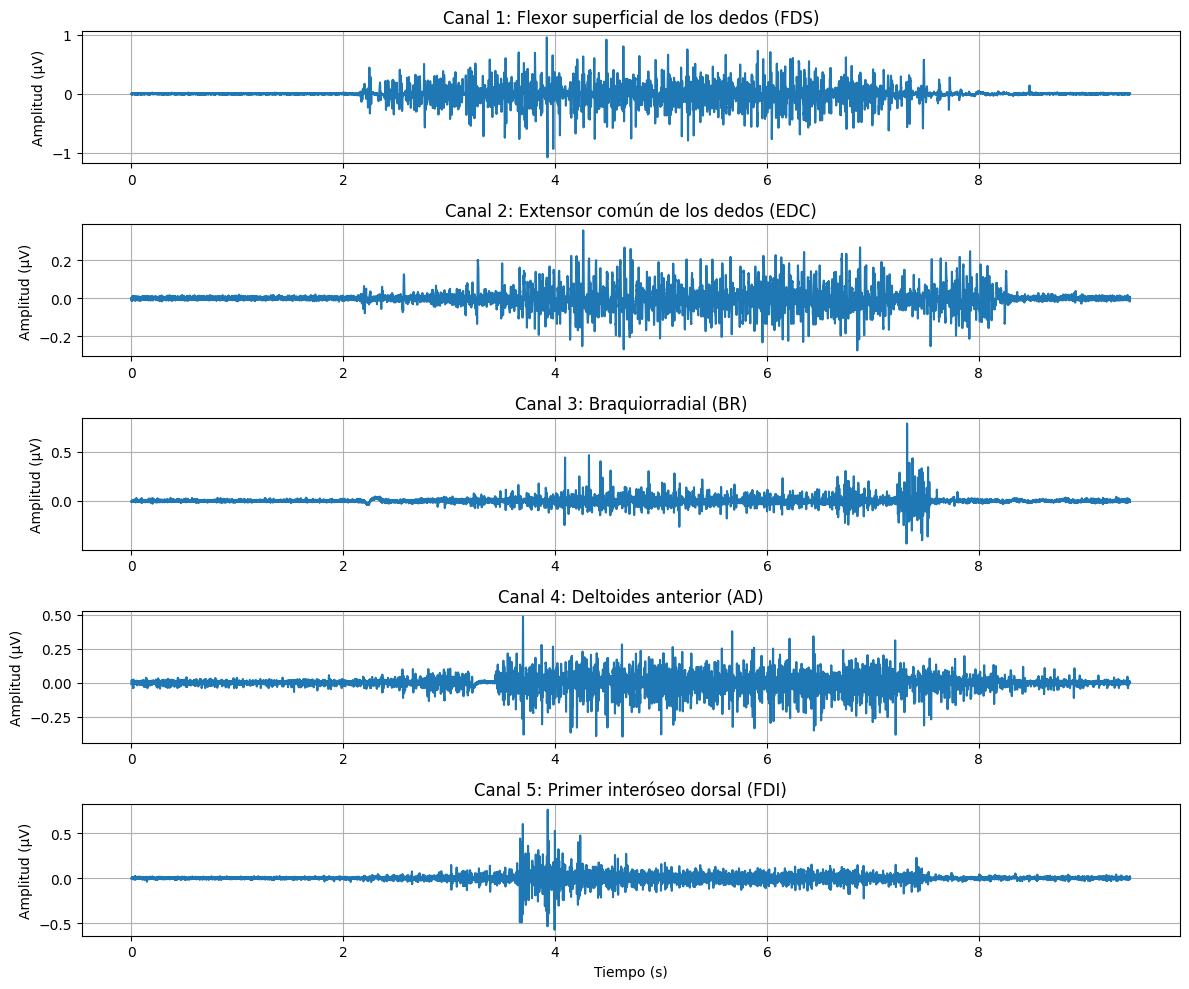

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

ws = loadmat("data/WS_P1_S1.mat", squeeze_me=True, struct_as_record=False)["ws"]
w1 = ws.win[0]

emg1 = np.asarray(w1.emg)
t1 = np.asarray(w1.emg_t).ravel()

n_channels = emg1.shape[1]
plt.figure(figsize=(12, 2*n_channels))
names = ["Flexor superficial de los dedos (FDS)", "Extensor común de los dedos (EDC)", 
         "Braquiorradial (BR)", "Deltoides anterior (AD)", "Primer interóseo dorsal (FDI)"]
for i in range(n_channels):
    plt.subplot(n_channels, 1, i+1)
    plt.plot(t1, emg1[:, i])
    plt.ylabel("Amplitud (µV)")
    plt.grid(True)
    plt.title(f"Canal {i+1}: " + names[i])
plt.xlabel("Tiempo (s)")
plt.tight_layout()
plt.show()